All y values: 5.0, 4.9604455347517105, 4.921764686846905, 4.8839320111022095, 4.846923040996172, 4.810714242066247, 4.7752829679436894, 4.7406074188537906, 4.706666602421655, 4.6734402966354684, 4.640909014829947, 4.609053972562579, 4.577857056264362, 4.5473007935550935, 4.517368325121029, 4.488043378059787, 4.459310240603971, 4.431153738141017, 4.403559210452372, 4.376512490100282, 4.349999881895235, 4.324008143381553, 4.298524466282716, 4.273536458851779, 4.249032129075815, 4.224999868686538, 4.201428437932332, 4.178306951069705, 4.155624862534839, 4.133371953758319, 4.1115383205884175, 4.090114361290411, 4.069090765091378, 4.048458501241784, 4.028208808566837, 4.008333185482229, 3.988823380450368, 3.9696713828545747, 3.9508694142700596, 3.932409920111693, 3.914285561639725, 3.8964892083056903, 3.879013930421726, 3.861852992137467, 3.844999844709577, 3.8284481200497753, 3.812191624538019, 3.796224333088205, 3.7805403834544533, 3.7651340707666674, 3.749999842284671, 3.735132292360794,

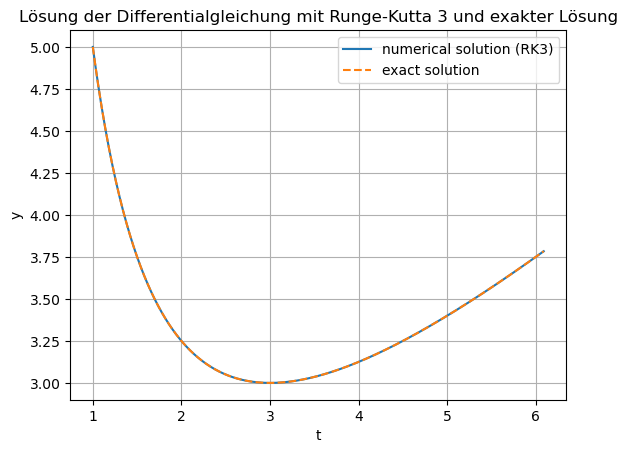

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math

def get_butcher_tableau(n):
    """
    Liefert die Butcher-Tabelle für Runge-Kutta-Verfahren der Ordnung n.
    Unterstützte Ordnungen: 1, 2, 3, 4.
    """
    if n == 1:  # Euler-Verfahren
        A = np.array([[0]])
        b = np.array([1])
        c = np.array([0])
    elif n == 2:  # Heun-Verfahren
        # Modifiziertes Euler-Verfahren
        A = np.array([[0, 0], [1, 0]])
        b = np.array([0.5, 0.5])
        c = np.array([0, 1])

        # Mittelpunkt-Verfahren
        # A = np.array([[0, 0], [0.5, 0]])
        # b = np.array([0, 1])
        # c = np.array([0, 0.5])
    elif n == 3:
        # Die von dir bereitgestellte Butcher-Tabelle für n = 3
        A = np.array([
            [0, 0, 0],
            [1/3, 0, 0],
            [0, 2/3, 0]
        ])
        b = np.array([1/4, 0, 3/4])
        c = np.array([0, 1/3, 2/3])
    elif n == 4:  # Klassisches RK4-Verfahren
        A = np.array([[0, 0, 0, 0], [1 / 2, 0, 0, 0], [0, 1 / 2, 0, 0], [0, 0, 1, 0]])
        b = np.array([1 / 6, 1 / 3, 1 / 3, 1 / 6])
        c = np.array([0, 1 / 2, 1 / 2, 1])
    else:
        raise ValueError(
            "Runge-Kutta-Verfahren der Ordnung n={} ist nicht implementiert.".format(n)
        )

    return A, b, c

def runge_kutta_n(f, y0, t, n):
    """
    Allgemeines Runge-Kutta-Verfahren beliebiger Ordnung n für die Lösung von ODEs

    Parameters:
    f  - Funktion, die die rechte Seite der Differentialgleichung definiert y' = f(t, y)
    y0 - Anfangsbedingung
    t  - Array von Zeitpunkten, an denen die Lösung berechnet werden soll
    n  - Ordnung des Runge-Kutta-Verfahrens

    Returns:
    y  - Array der berechneten Werte der Lösung zu den Zeitpunkten t
    """
    A, b, c = get_butcher_tableau(n)
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    h = t[1] - t[0]  # Annahme: Gleichmäßige Zeitschritte

    for i in range(1, len(t)):
        k = np.zeros((n, len(y0)))
        # display(Math(rf"t_{{{i-1}}} = {t[i-1]:.2f}, y_{{{i-1}}} = {y[i-1]}"))
        for j in range(n):
            k_sum = sum(A[j, l] * k[l] for l in range(j))
            k[j] = f(t[i - 1] + c[j] * h, y[i - 1] + h * k_sum)
            # display(Math(f"k_{{{j+1}}} = f(t_{{{i-1}}} + c_{{{j+1}}} \\cdot h, y_{{{i-1}}} + h \\cdot \\sum_{{l=1}}^{{{j}}} a_{{{j+1},l}} k_{{l}})"))
            #display(Math(rf"k_{{{j+1}}} = f({{{t[i - 1]}}} + c_{{{j+1}}} \cdot h, y_{{{i-1}}} + h \cdot \\sum_{{l=1}}^{{{j}}} a_{{{j+1},l}} k_{{l}})"))
            # display(Math(f"\\quad = f({t[i-1] + c[j] * h:.2f}, {y[i-1] + h * k_sum})"))
            # display(Math(f"\\quad = {k[j]}"))

        y[i] = y[i - 1] + h * sum(b[j] * k[j] for j in range(n))
        # display(Math(f"y_{{{i}}} = y_{{{i-1}}} + h \\cdot \\sum_{{j=1}}^{{{n}}} b_j k_j"))
        # display(Math(f"\\quad = {y[i-1]} + {h:.2f} \\cdot \\sum_{{j=1}}^{{{n}}} {b[j]} \\cdot {k[j]}"))
        # display(Math(f"\\quad = {y[i]}"))
        # display(Math("\\\\"))  # For new line in output

    return y

"""
=======================================================================================================================
INPUT
=======================================================================================================================
"""

# Beispiel-Funktion: y' = t / y, mit der Anfangsbedingung y(2) = 1
def f(t, y):
    return 1 - y / t

# Exakte Lösung der Differentialgleichung (optional)
def exact_solution(t):
    return t / 2 + 9 / (2*t)

# Zeitspanne von 2 bis 5, mit einer Schrittweite von 0.1
t = np.arange(1, 6.1, 0.01)  # Beachte, dass 6.1 verwendet wird, um 5 einzuschließen
y0 = np.array([5])  # Anfangsbedingung

# Lösung der Differentialgleichung mit Runge-Kutta 4
y = runge_kutta_n(f, y0, t, 3)

"""
=======================================================================================================================
"""

print("All y values:", ', '.join(map(str, y.flatten().tolist())))

y_exact = np.array([exact_solution(ti) for ti in t])

# Plotten der numerischen und exakten Lösung
plt.plot(t, y, "-", label="numerical solution (RK3)")
plt.plot(t, y_exact, "--", label="exact solution")
plt.xlabel("t")
plt.ylabel("y")
plt.title("Lösung der Differentialgleichung mit Runge-Kutta 3 und exakter Lösung")
plt.legend()
plt.grid(True)
plt.show()
